<a href="https://colab.research.google.com/github/Ganasa18/belajar-tensorflow/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in Tensorflow

There are many defininitions for a regression prubm but in our case, we'ere going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

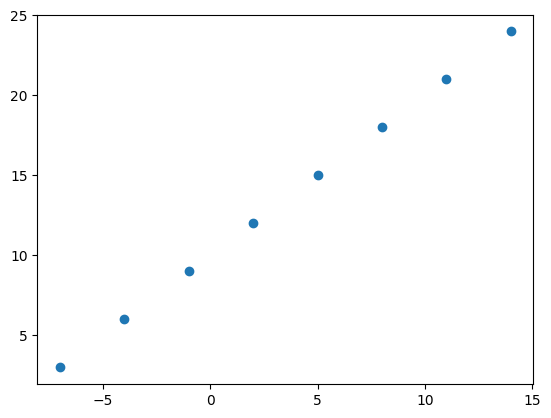

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# # Create features
# X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# # Create labels
# y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
# X + 10 for to make labels have relationship
# -7 + 10 = 3 | -4 + 10 = 6
y == X + 10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem

# Input Shapes 3
house_info = tf.constant(["bedroom", "bathroom", "garage"])
# Output Shapes 1
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [6]:
X[1], y[1]

(<tf.Tensor: shape=(), dtype=float32, numpy=-4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [10]:
# Turn our NumPy arrays into tensors with dtype
X = tf.constant(X)
y = tf.constant(y)
# X = tf.cast(tf.constant(X), dtype=tf.float32)
# y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

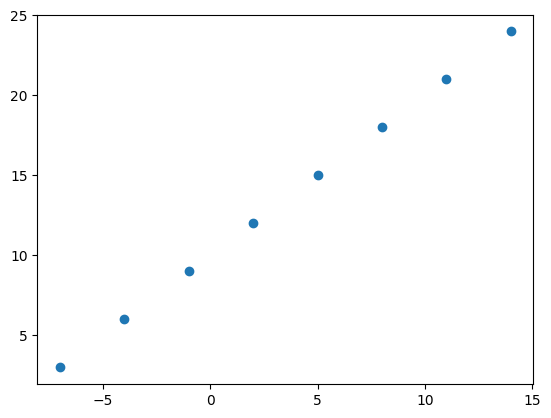

In [12]:
plt.scatter(X, y)

## Steps in modellng with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layes of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [13]:
# model = tf.keras.Sequential()
# model.add(tf.keras.Input(shape=(16,)))
# model.add(tf.keras.layers.Dense(8))
# ...
# model = tf.kears.Sequential()
# model.add(tf.keras.layers.Dense(1))
# model.add(tf.keras.layers.Dense(1))

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error (computes the mean absolute error beetween labels and predictions)
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              # optimizer="sgd",
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 567ms/step - loss: 9.1030 - mae: 9.1030
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 8.9705 - mae: 8.9705
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 8.8380 - mae: 8.8380
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 8.7055 - mae: 8.7055
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 8.5730 - mae: 8.5730


In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model (add 17.0 predict)
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 167ms/step


array([[24.381826]], dtype=float32)

## Improving our model

We can improve our mode, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change he optimzization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we mgith fit a model for more epochs (leave it training for longer) or on more data (give the model more examples)

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fite the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 500ms/step - loss: 8.4403 - mae: 8.4403
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 8.3078 - mae: 8.3078
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 8.1753 - mae: 8.1753
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 8.0428 - mae: 8.0428
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 7.9103 - mae: 7.9103
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 7.7778 - mae: 7.7778
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 7.6453 - mae: 7.6453
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5129 - mae: 7.5129
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4400 - mae: 7.4400
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 7.4344 - mae: 7.4344
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - l

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see of our model's prediction has improved..
model.predict([17.0])

1/1 [==============================] - 0s 117ms/step


array([[30.10544]], dtype=float32)

In [20]:
# Let's see if we can make another to improve model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fite the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.8105 - mae: 12.8105
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.0824 - mae: 12.0824
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.3502 - mae: 11.3502
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6120 - mae: 10.6120
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 9.8664 - mae: 9.8664
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 9.1120 - mae: 9.1120
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 8.3471 - mae: 8.3471
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 7.5699 - mae: 7.5699
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 6.8779 - mae: 6.8779
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 6.8895 - mae: 6.8895
Epoch 11/100
1/1 [==============================] - 0s 12ms/ste

In [21]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 86ms/step


array([[28.044456]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when build neural ntework is :

```
Build a model -> fit it -> evaliate it -> tweak a model -> fit it -> evaluate it -> tewak a model -> fit it -> evaluate it ...
```

When it comes to evaluation.. there are 3 words you should memorize :

> "Visualize, visualize, visualize"
It's good idea to visalize:
* The data - what data are we working with ? What does it look like ?
* The model itself - what does our model look like ?
* The training of a model - how does a model perform whie it learns?
* The prediction of the model - how do the predions of a model line up agains the ground truth (the original labels)?

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
#  Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

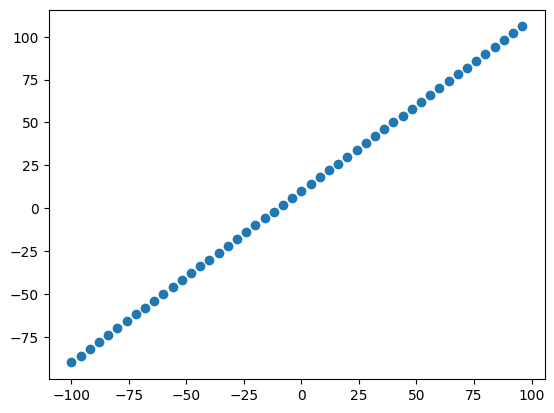

In [25]:
# Visualize the data
import matplotlib.pyplot as plt

# plt.plot(X, y)
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, whic is typically 10-15% of the data availbale.

* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.


In [26]:
# Check the length of how many sample we have
len(X)

50

In [27]:
#  Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

# labels
X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now, we've got our data in training and test sets... let's visualize it again!

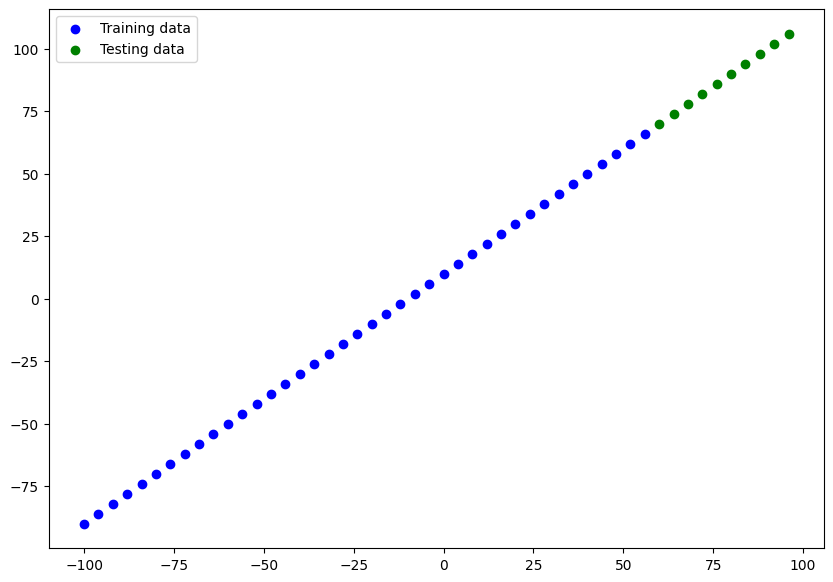

In [28]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [29]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train epochs=100)

## Visualinzing the model


In [30]:
# model.summary()

In [31]:
# X.shape
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [32]:
# Let's create a model which builds models automatically by defining the shape argument
tf.random.set_seed(42)

# Create a model (same as above)
# Dense = same as fully connected layer
# Fundamentals of neural network Weights and Biases
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # because one input and one output X[0], y[0]
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model. (X and y)
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or paramters from other models during **transfer learning**).



In [34]:
#  Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [35]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


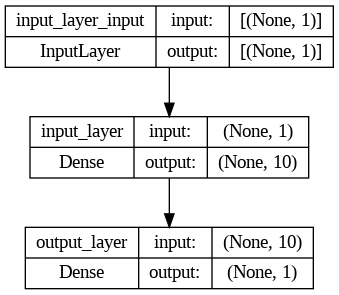

In [36]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

To visualize predictions it's a good idea to plot them agains the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model;s predictions)


In [37]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 73ms/step


array([[ 70.498215],
       [ 75.08167 ],
       [ 79.66513 ],
       [ 84.24859 ],
       [ 88.83205 ],
       [ 93.41551 ],
       [ 97.99896 ],
       [102.58242 ],
       [107.16588 ],
       [111.74934 ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** if you feel like you-re going to reuse some kind of functionality in the future, it's a good idea to
turn into a function

In [39]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's preditions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


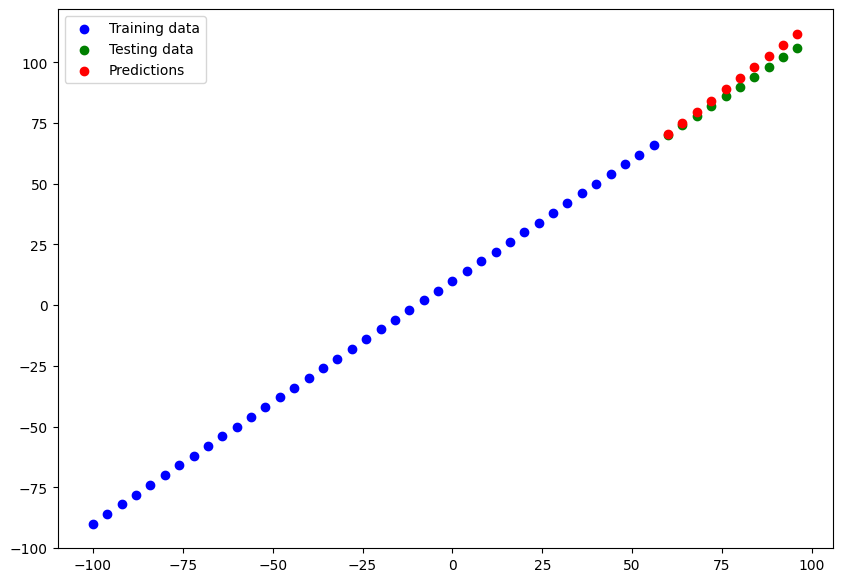

In [40]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's preditions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model;s preditions"
* MSE - mean square error, "square the average errors"

In [41]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 188ms/step - loss: 3.1238 - mae: 3.1238


[3.123772382736206, 3.123772382736206]

In [42]:
# Calculate the maen absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.601429, 14.150996, 11.733948, 10.350283, 10.      , 10.683103,
       12.399585, 15.265936, 19.165878, 23.749336], dtype=float32)>

In [43]:
# tf.constant to make tensor format
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.498215],
       [ 75.08167 ],
       [ 79.66513 ],
       [ 84.24859 ],
       [ 88.83205 ],
       [ 93.41551 ],
       [ 97.99896 ],
       [102.58242 ],
       [107.16588 ],
       [111.74934 ]], dtype=float32)>

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
# Remove shape dimension ,1 to make same shape
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.498215,  75.08167 ,  79.66513 ,  84.24859 ,  88.83205 ,
        93.41551 ,  97.99896 , 102.58242 , 107.16588 , 111.74934 ],
      dtype=float32)>

In [46]:
# Calcluate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1237762>

In [47]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.566469>

In [48]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it ->fit it -> evaluate it ...
```

1. Get more data - get more example for your mode to train on(more opportunites to learn patterns or realtionship between features and labels).

2. Make your model larger (using a more complex model) - this migh come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layeres, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

***Build model_1***

In [49]:
# X_train, y_train
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 89.3773 - mae: 89.3773
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 53.9218 - mae: 53.9218
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 17.9073 - mae: 17.9073
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0176 - mae: 10.0176
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 11.3394 - mae: 11.3394
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.4651 - mae: 10.4651
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 9.4389 - mae: 9.4389
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.3029 - mae: 9.3029
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0183 - mae: 12.0183
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 13.9904 - mae: 13.9904
Epoch 11/100
2/2 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 59ms/step


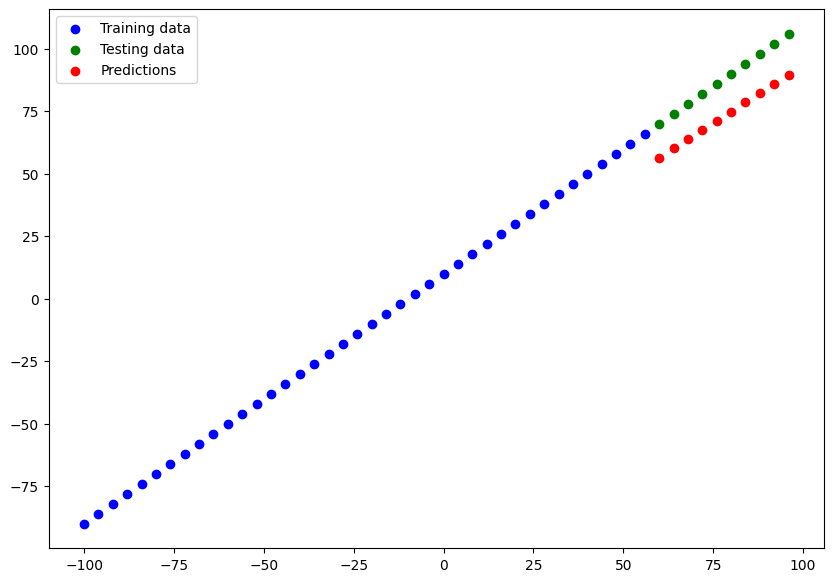

In [50]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [51]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1) # squeeze remove one demension

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[56.446194],
        [60.125233],
        [63.80427 ],
        [67.483315],
        [71.16235 ],
        [74.84139 ],
        [78.520424],
        [82.19946 ],
        [85.8785  ],
        [89.55754 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([56.446194, 60.125233, 63.80427 , 67.483315, 71.16235 , 74.84139 ,
        78.520424, 82.19946 , 85.8785  , 89.55754 ], dtype=float32)>)

In [52]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.998133>,
 <tf.Tensor: shape=(), dtype=float32, numpy=225.79382>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mse'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 13.7649 - mse: 294.2114
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 21.7062 - mse: 745.4691
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 19.3706 - mse: 549.7042
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 14.0382 - mse: 259.5456
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 15.6565 - mse: 317.4714
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 12.4226 - mse: 196.9267
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.7103 - mse: 168.9010
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 12.1114 - mse: 201.6966
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 38.0738 - mse: 2239.4038
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 25.6517 - mse: 924.1639
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 90ms/step


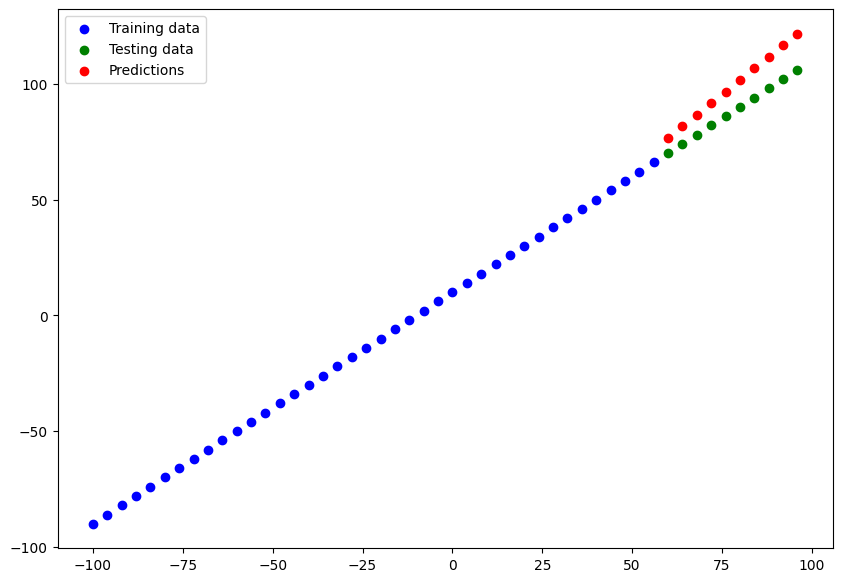

In [54]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [55]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.115316>,
 <tf.Tensor: shape=(), dtype=float32, numpy=131.66739>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [56]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 20ms/step - loss: 29.0546 - mae: 29.0546
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 23.2000 - mae: 23.2000
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 29.4389 - mae: 29.4389
Epoch 4/500
2/2 [==============================] - 0s 13ms/step - loss: 23.0211 - mae: 23.0211
Epoch 5/500
2/2 [==============================] - 0s 18ms/step - loss: 13.7642 - mae: 13.7642
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 11.0398 - mae: 11.0398
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 12.0205 - mae: 12.0205
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 10.8303 - mae: 10.8303
Epoch 9/500
2/2 [==============================] - 0s 14ms/step - loss: 37.3263 - mae: 37.3263
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 25.0202 - mae: 25.0202
Epoch 11/500
2/2 [==============================] 

1/1 [==============================] - 0s 142ms/step


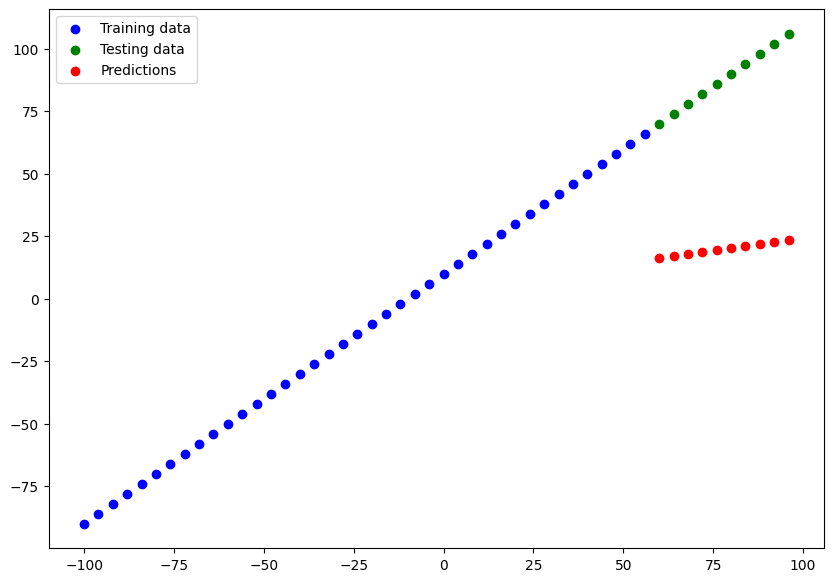

In [57]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [58]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.11183>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4724.2656>)

🗝️ **Note:** you want to start with small experiments (small models) and make sure they work and tehn increase their scale when necessary.

### Comparing the results of our experiments
We've run few experiments, let's compare the results.

In [59]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
# change to numpy to read able mae and mse
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.998133,225.793823
1,model_2,11.115316,131.667389
2,model_3,68.111832,4724.265625


Looks like `model_2` perofmed the best...

In [60]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🗝️ **Note:** One of your main golals hould be to minimize the time between your experiments. The more experiments you do, the more this you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".



### Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

[TensorBoard](https://tensorboard.dev/) - a component of the TensorFlow library to help track modelling experiments (we'll see this later).

[Weights & Biases](https://wandb.ai/site/) - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

There tare tow main formats we  can save our mode's too:

1. The [SavedModel](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) format (default)
2. The [HDF5](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format) format

### Saving our models

Saving our models allows us to use them otuside of Google Colab (or wherever thew were trained) such as in a web application or a mobile app.

In [61]:
# Save model using the SavedModel
model_2.save("best_model_SavedModel_format")

In [62]:
# Save model using the HDF5 format (Hierarchical Data Format) designed to store and organize large amounts of data
# outside of tenserflow code best format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading the saved model

In [63]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

# Compare the MAE of model 2 and loaded SavedModel
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 105ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [66]:
# Load in model in h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 89ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [68]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
model_2_preds.squeeze()

array([ 76.651695,  81.643616,  86.63552 ,  91.62745 ,  96.619354,
       101.61128 , 106.603195, 111.5951  , 116.58702 , 121.578926],
      dtype=float32)

In [70]:
loaded_SavedModel_format_preds.squeeze()

array([ 76.651695,  81.643616,  86.63552 ,  91.62745 ,  96.619354,
       101.61128 , 106.603195, 111.5951  , 116.58702 , 121.578926],
      dtype=float32)

## Downlaod a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go the the "files" and right click and download.

2. Use code (see the cell below).

3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below)



In [71]:
# Download a file from Google Colab
from google.colab import files

files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course


### A larger example

In [73]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
# Read in the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [77]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [78]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [79]:
# View X data
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [80]:
# View y labels
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [82]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# make random train

# Make 20% of data test
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [83]:
0.2*1338

267.6

In [84]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [85]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# Because numpy array cannot to reformat to tensor
# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 8514.3779 - mae: 8514.3779
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7881.3477 - mae: 7881.3477
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7570.1787 - mae: 7570.1787
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7702.2163 - mae: 7702.2163
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7633.0405 - mae: 7633.0405
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7644.7271 - mae: 7644.7271
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7573.6187 - mae: 7573.6187
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7737.8052 - mae: 7737.8052
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7504.7202 - mae: 7504.7202
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7565.1846 - mae: 7565.1846

In [86]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 8009.2324 - mae: 8009.2324


[8009.232421875, 8009.232421875]

In [89]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing to well.. lets try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer (200 epochs)
3. (insert your own experiment here)

In [93]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [94]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# SGD doesnt work try with Adam

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])


# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13287.2949 - mae: 13287.2949
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13102.5430 - mae: 13102.5430
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12725.0322 - mae: 12725.0322
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12006.7520 - mae: 12006.7520
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10839.1660 - mae: 10839.1660
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9391.2090 - mae: 9391.2090
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8103.4551 - mae: 8103.4551
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7514.1226 - mae: 7514.1226
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7423.3125 - mae: 7423.3125
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7404.1606 - mae:

In [95]:
#  Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4793.0903 - mae: 4793.0903


[4793.09033203125, 4793.09033203125]

In [96]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8009.2324 - mae: 8009.2324


[8009.232421875, 8009.232421875]

In [97]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])


# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13301.7539 - mae: 13301.7539
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13157.4941 - mae: 13157.4941
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12844.1963 - mae: 12844.1963
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12228.8008 - mae: 12228.8008
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11182.9697 - mae: 11182.9697
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9769.6729 - mae: 9769.6729
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8370.9141 - mae: 8370.9141
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7591.8369 - mae: 7591.8369
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7432.4341 - mae: 7432.4341
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.5967 - mae:

In [98]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 3506.8271 - mae: 3506.8271


[3506.8271484375, 3506.8271484375]

In [100]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8009.2324 - mae: 8009.2324


[8009.232421875, 8009.232421875]

Text(0.5, 0, 'epochs')

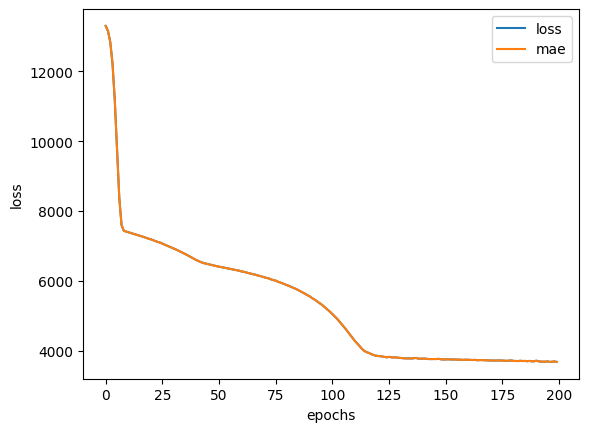

In [101]:
# Plot history (also known as a loss curve or a training curve)
# history from fit the model to visualize
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long should you train for ?

It depends. Really, it depends on the problem you're working on. However, many people have asked this question before

TensorfFlow has a solution It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), whic is a TensorFlow component you can add to your model to stop training once it stops improving a certain metrics.

## Preprocessing data (normalization and standarization)

in terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few callses form Scikit-Lear

In [113]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [114]:
# What does our dataa look like now ?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [115]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [116]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [118]:
# X_train has 6 column, X_train_normal has 11 column
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.
Now let's build a neural network model on it and see how it goes.

In [121]:
# Build a neural network model to fit on our normalize data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 6ms/step - loss: 13343.7109 - mae: 13343.7109
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13335.3789 - mae: 13335.3789
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13314.6719 - mae: 13314.6719
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13270.7373 - mae: 13270.7373
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13192.3135 - mae: 13192.3135
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13068.4463 - mae: 13068.4463
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12888.9521 - mae: 12888.9521
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 12643.7529 - mae: 12643.7529
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12322.6699 - mae: 12322.6699
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11921.02

In [122]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 12ms/step - loss: 3434.7771 - mae: 3434.7771


[3434.777099609375, 3434.777099609375]

In [ ]:
# Insurance model 2 result
# 9/9 [==============================] - 0s 2ms/step - loss: 4793.0903 - mae: 4793.0903

In [120]:
insurance_model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               1200      
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

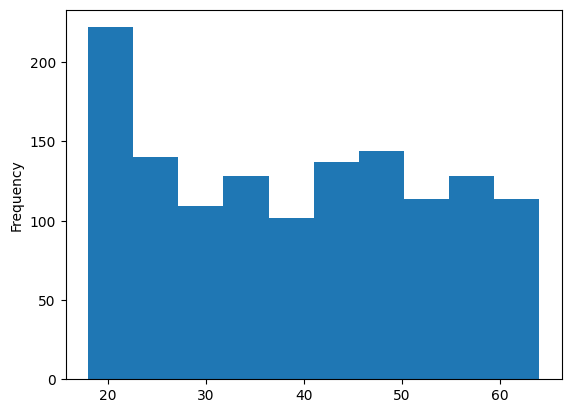

In [104]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

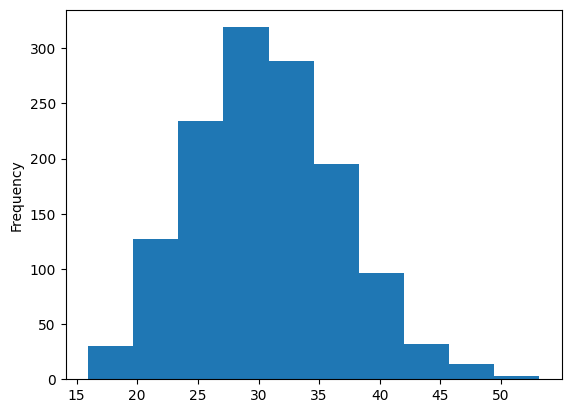

In [105]:
X["bmi"].plot(kind="hist")

In [107]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64